In [1]:
import sys
sys.path.append('./src')

import matplotlib.pyplot as plt
import pandas as pd
import torch
from runpy import run_path 
from torch.utils.data import DataLoader

from model import OCRModel
from data.dataset import OCRBarcodeDataset

In [3]:
config = run_path('/root/cvr-hw2-ocr/src/configs/config.py')['CONFIG']

ocr_model = OCRModel.load_from_checkpoint(
    '/root/cvr-hw2-ocr/checkpoints/resnet_34_small/epoch=17-step=180.ckpt',
    model=config.model,
    optimizer=config.train.optimizer,
    lr_scheduler=config.train.lr_scheduler,
    criterion=config.train.criterion,
)

In [7]:
dataset = OCRBarcodeDataset(
    images_dir='/root/cvr-hw2-ocr/data/barcodes-annotated-gorai/images',
    annot_df=pd.read_table(
        '/root/cvr-hw2-ocr/data/barcodes-annotated-gorai/full_annotation.tsv',
        sep='\t',
        dtype={'filename': str, 'code': str}
    ),
    add_border=config.dataset.add_border,
    img_height=config.dataset.img_height,
    img_width=config.dataset.img_width,
)


dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

In [8]:
images, text, encoded_text, target_length = next(iter(dataloader))

preds = ocr_model(images)  # [time_steps, batch_size, alphabet_size (10 цифр + 1 для blank символа)]

input_length = torch.full(size=(preds.size(1),), fill_value=preds.size(0), dtype=torch.long)

# loss = self.criterion(preds, encoded_text, input_length, target_length)

In [13]:
text

('4610032770015',
 '4606711705270',
 '4607110700668',
 '4607085860985',
 '4607071773442')

In [15]:
print(images.shape, encoded_text.shape, target_length.shape, input_length.shape)

torch.Size([5, 3, 128, 512]) torch.Size([5, 13]) torch.Size([5]) torch.Size([5])


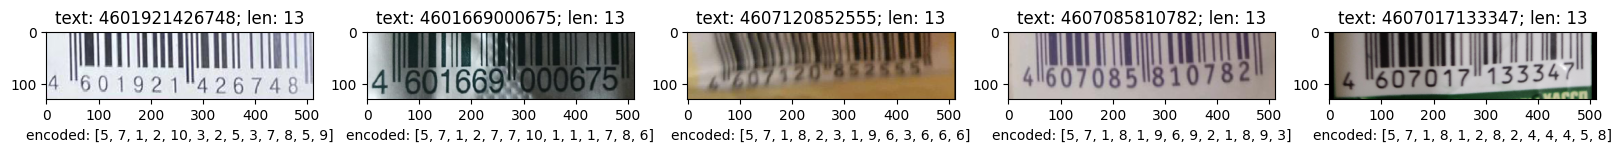

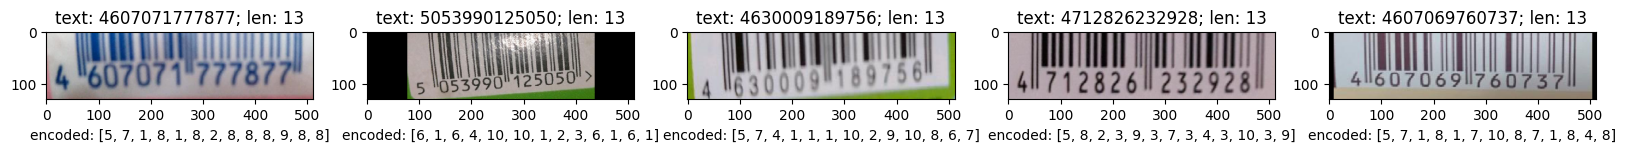

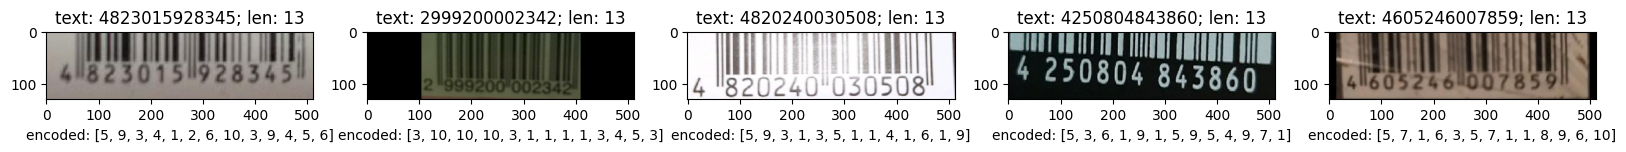

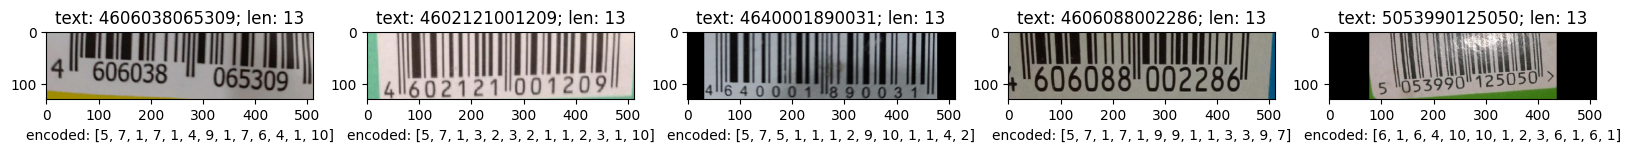

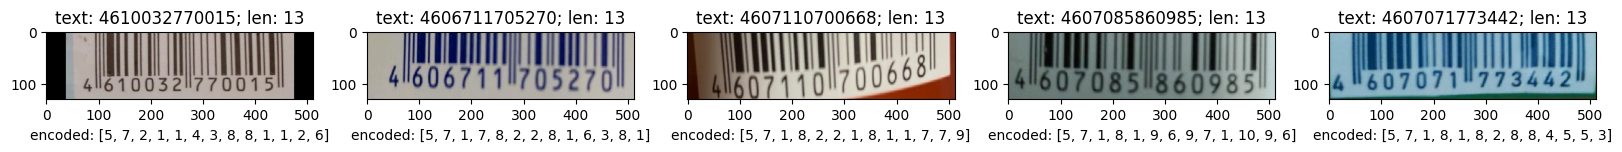

In [9]:
for _ in range(5):
    images, text, encoded_text, _ = next(iter(dataloader))

    fig, axs = plt.subplots(1, 5, figsize=(20, 15))

    for i, ax in enumerate(axs):
        ax.imshow(images[i].permute(1, 2, 0))
        ax.set_title(f'text: {text[i]}; len: {target_length[i]}')
        ax.set_xlabel(f'encoded: {encoded_text[i].tolist()}')



In [4]:
len(dataset)

540

In [4]:
for img, text, encoded_text, target_len in dataloader:
    a = 1

In [6]:
img, text, encoded_text, target_len = next(iter(dataloader))

target_len

tensor([13, 13, 13, 13, 13])

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

In [9]:
root = '/root/cvr-hw2-ocr/data/barcodes-annotated-gorai/images'

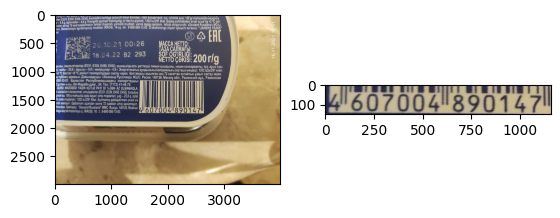

In [11]:
img = cv2.imread(os.path.join(root, '5193859d-d0ad-4058-aa08-4ad5fb0b238a--ru.485501a3-32c4-44b1-9c50-4b673ee0c06a.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(img[1601:1752, 1466:2625, :])

In [5]:
images, text, encoded_text, _ = next(iter(dataloader))

In [10]:
images.max(), images.min()

(tensor(1.), tensor(0.))

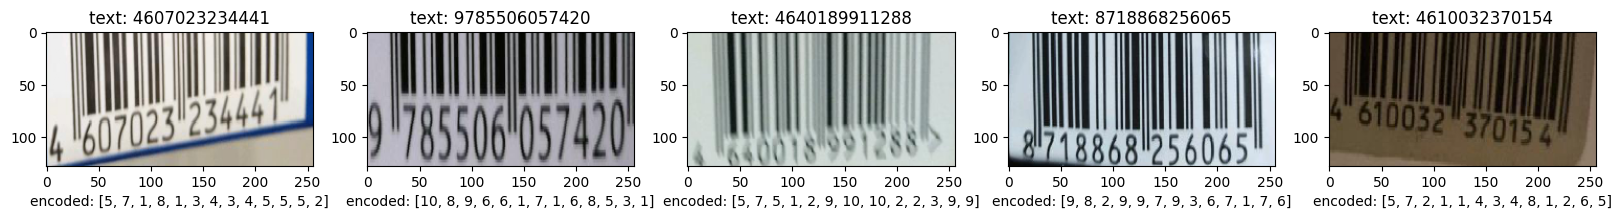

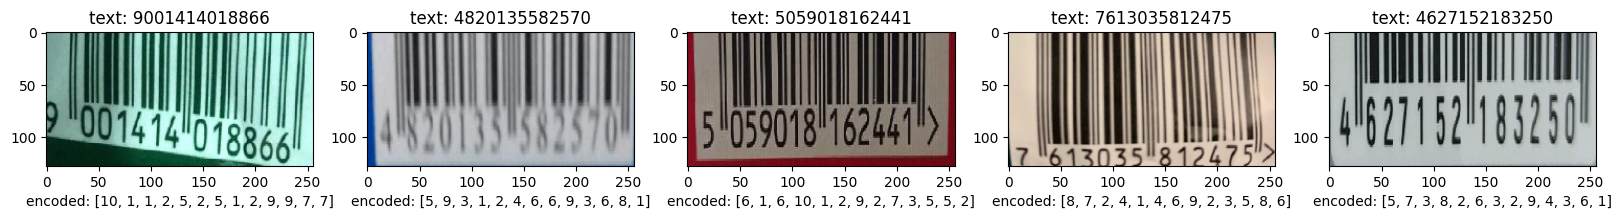

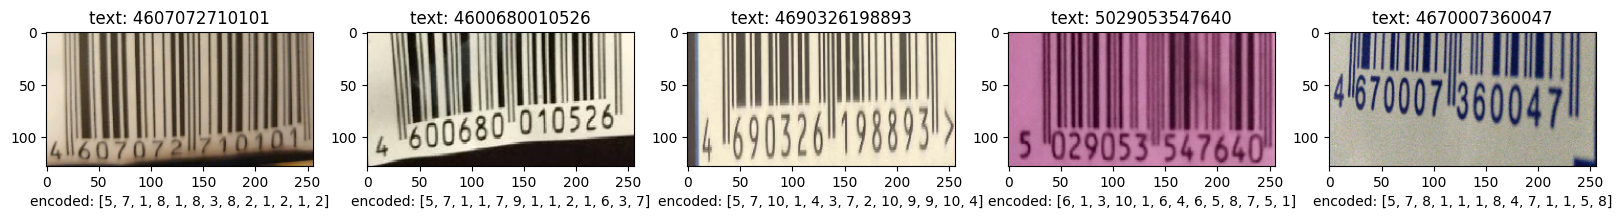

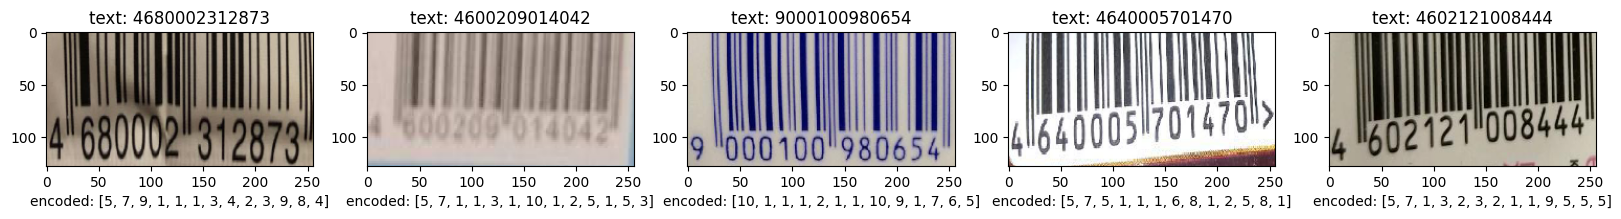

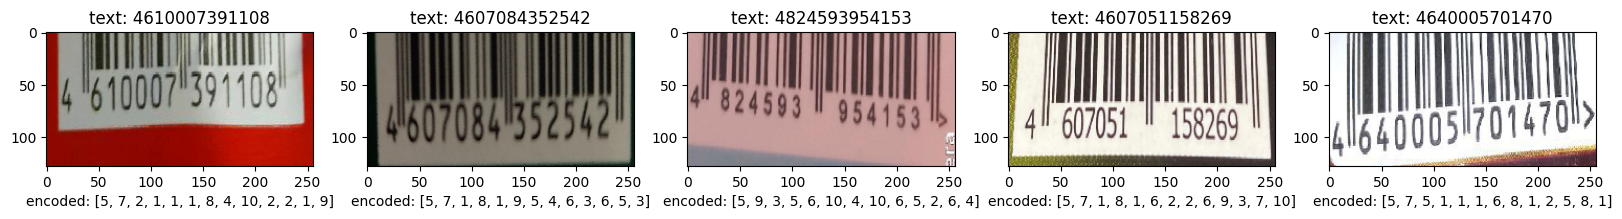

In [12]:
for _ in range(5):
    images, text, encoded_text, _ = next(iter(dataloader))

    fig, axs = plt.subplots(1, 5, figsize=(20, 15))

    for i, ax in enumerate(axs):
        ax.imshow(images[i].permute(1, 2, 0))
        ax.set_title(f'text: {text[i]}')
        ax.set_xlabel(f'encoded: {encoded_text[i].tolist()}')


In [7]:
output = ocr_model(images)
output.shape

torch.Size([256, 5, 11])

In [9]:
pred = torch.argmax(output.detach().cpu(), -1).permute(1, 0).numpy()
pred[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
len(text[0])

13

In [11]:
pred = torch.argmax(output.detach().cpu(), -1).permute(1, 0).numpy()
pred[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
batch_size = output.shape[1]
batch_size

1

In [12]:
from torch.autograd import Variable
import torch

In [14]:
batch_size = 2

In [15]:
input_length = Variable(torch.IntTensor([output.size(1)] * batch_size))
output_lenghts = torch.full(
    size=(output.size(1),),
    fill_value=output.size(0),
    dtype=torch.long
)

In [16]:
output_lenghts

tensor([512, 512])

In [17]:
input_length

tensor([2, 2], dtype=torch.int32)

In [10]:
import torch
from torch import nn

In [8]:
output = ocr_model(images)

In [11]:
pred = torch.argmax(output.detach().cpu(), -1).permute(1, 0).numpy()
pred.shape

(1, 512)

In [12]:
pred

array([[5, 7, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 